# LitPop class

The modeling of economic disaster risk on a global scale requires high-resolution maps of exposed asset values. We have developed a generic and scalable method to downscale national asset value estimates proportional to a combination of nightlight intensity ("Lit") and population data ("Pop"). 

Asset exposure value is distributed to the grid proportzonal to $Lit^m Pop^n$, computed at each grid cell:


$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \N_0$ (Default values are $m=n=1$).


For more information please refer to the related publication (https://doi.org/10.5194/essd-12-817-2020) and data archive (https://doi.org/10.3929/ethz-b-000331316).

How to cite:

Eberenz, S., Stocker, D., Röösli, T., and Bresch, D. N.: Asset exposure data for global physical risk assessment, Earth Syst. Sci. Data, 12, 817–833, https://doi.org/10.5194/essd-12-817-2020, 2020.


## Input data:

All required data except for the population data (GPW) is acquired automatically when LitPop is initiated.

*Nigthlights*: Black Marble 2016 annual composite of the VIIRS day-night band (DNB) at 15 arcsec resolution is downloaded from the NASA Earth Observatory: https://earthobservatory.nasa.gov/Features/NightLights (available for 2012 and 2016 at 15 arcsec resolution (~500m))

*Population*: Gridded Population of the World (GPW), v4: Population Count, v4.10, v4.11 or later versions (2000, 2005, 2010, 2015, 2020), available from http://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse.

The GPW file of the year closest to the target year is required.
To download GPW data you need to register on the SEDAC website (for free).
Then you can access the download site, i.e.: http://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-count-rev11/data-download.
There, choose the settings as shown, ticking the box of the years you need:
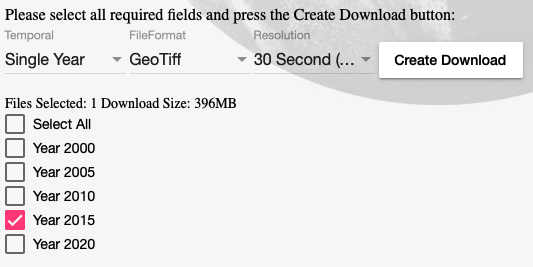
The population data from GWP needs to be downloaded manually as TIFF from this site and placed in the system data folder of climada, i.e.: climada_python/data/system/gpw_v4_population_count_rev11_2015_30_sec.tif.

Direct download links are avilable, also for older versions, i.e.:
- v4.11: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev11/gpw-v4-population-count-rev11_2015_30_sec_tif.zip
- v4.10: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev10/gpw-v4-population-count-rev10_2015_30_sec_tif.zip, 
- Overview over all versions of GPW v.4: https://beta.sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse

*Macroeconomic indicator*: Available macroeconomic indicators can be selected via the variable fin_mode:
- 'pc': produced capital (Source: World Bank DataBank), incl. manufactured or built assets such as machinery, equipment, and physical structures (pc is in constant 2014 USD, data is available for the years 1995, 2000, 2005, 2010, 2014). The pc-data is stored in the subfolder *data/system/Wealth-Accounts_CSV/*. Source: https://datacatalog.worldbank.org/dataset/wealth-accounting
- 'gdp': gross-domestic product (Source: World Bank)
- 'income_group': gdp multiplied by country's income group+1
- 'nfw': households' non-financial wealth (Source: Credit Suisse, of households only)
- 'tw': households' total wealth (Source: Credit Suisse, of households only)

Regarding the GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

## Downloading existing LitPop asset exposure data

Readily computed LitPop asset exposure data based on $Lit^1Pop^1$ for 224 countries, distributing produced capital / non-financial wealth of 2014 at a resolution of 30 arcsec can be downloaded from the ETH Research Repository: https://doi.org/10.3929/ethz-b-000331316.
The dataset contains gridded data for more than 200 countries as CSV files. [These can be imported into Python using the Exposures class, i.e. *Exposures(pd.read_csv(file_name))*]


Please refer to and quote the related publication if you are using LitPop exposure data in your studies:
https://doi.org/10.5194/essd-2019-189.


## Initiating LitPop()

The `LitPop` class inherits from the [`Exposures`](climada_entity_Exposures.ipynb#Exposures-class) class. It provides a `set_country()` method which enables to compute exposure data for a country using different settings and input data. The first time a nightlight image is used, it is downloaded and stored locally. This might take some time.



## LitPop methods
* `set_countries`: set exposure for one or more countries, see section *Country Exposure* below.
* `set_country`: alias of `set_countries`
* `set_lit`: wrapper around `set_countries` and `set_custom_shape` to load nightlight data to exposure.
* `set_pop`: wrapper around `set_countries` and `set_custom_shape_population` to load pure population data to exposure. This can be used to initiate a population exposure set.
* `set_custom_shape_from_country`: given a shape and a country code, exposure is initiated for the country and then cropped to the shape. See section *Set custom shapes* below.
* `set_custom_shape`: given any shape or geometry and an estimate of total values, exposure is initiated for the shape directly.
* `set_custom_shape_population`: given any shape or geometry, population exposure is initiated for the shape directly.


In [1]:
# Import required packages:
import numpy as np
import pandas as pd
from matplotlib import colors

from climada.entity.exposures.litpop.litpop import LitPop

## Country Exposure
In the following, we will create exposure data sets and plots for a variety of countries, comparing different settings.
### Default Settings

In [7]:
# Initiate a default LitPop exposure entity for Switzerland (ISO3-Code 'CHE'):
ent = LitPop()
ent.set_country('CHE')

""" In case you encounter an error here, because the GPW data is missing: The gridded population count data used are the following:
- Gridded Population of the World (GPW), v4: Population Count, v4.10 or later (2000, 2005, 2010, 2015, 2020).
http://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse
The population data from GWP needs to be downloaded manually as TIFF
from this site and placed in the system data folder of climada,
i.e.: climada_python/data/system/gpw_v4_population_count_rev10_2015_30_sec.tif
"""

2021-06-21 15:59:40,159 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: CHE, 756 ...
 
2021-06-21 15:59:40,161 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-21 15:59:43,963 - climada.util.finance - INFO - GDP CHE 2014: 7.092e+11.
2021-06-21 15:59:44,400 - climada.util.finance - INFO - GDP CHE 2019: 7.031e+11.
2021-06-21 15:59:44,443 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-21 15:59:44,445 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-21 15:59:44,446 - climada.entity.exposures.base - INFO - cover not set.
2021-06-21 15:59:44,447 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-21 15:59:44,449 - climada.entity.exposures.base - INFO - centr_ not set.


' In case you encounter an error here, because the GPW data is missing: The gridded population count data used are the following:\n- Gridded Population of the World (GPW), v4: Population Count, v4.10 or later (2000, 2005, 2010, 2015, 2020).\nhttp://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse\nThe population data from GWP needs to be downloaded manually as TIFF\nfrom this site and placed in the system data folder of climada,\ni.e.: climada_python/data/system/gpw_v4_population_count_rev10_2015_30_sec.tif\n'

### Plotting
The exposure entity was initiated using the default setting, i.e. a resolution of 30 arcsec and produced capital 'pc' as total asset value, using the exponents $[1, 1]$.

If the init worked, we can now plot a map of Switzerland's exposure.
We can get a good impression of the exposure distribution in Switzerland by comparing plots with linear and log-normal colormaps:

(please refer to the exposure tutorial *climada_entity_Exposures.ipynb* for more info on the visualization of exposure data.)

2021-06-21 16:02:05,074 - climada.util.coordinates - INFO - Setting geometry points.
2021-06-21 16:02:06,678 - climada.util.coordinates - INFO - Raster from resolution 0.00833333333333286 to 0.00833333333333286.


<GeoAxesSubplot:title={'center':"LitPop Exposure for ['CHE'] at 30 as, year: 2020, financial mode: pc,\nexp: [1, 1], admin1_calc: False"}>

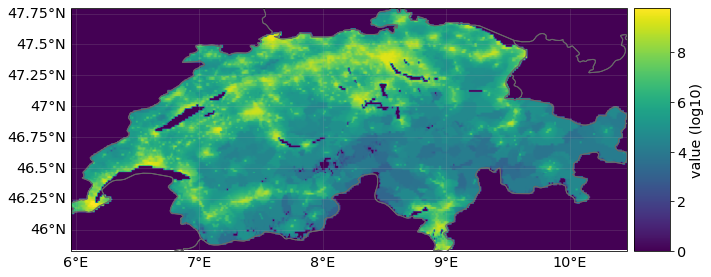

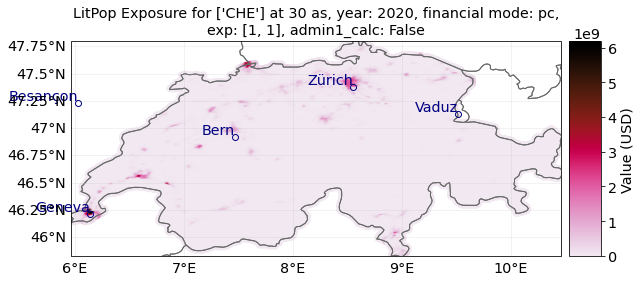

In [11]:
ent.set_geometry_points()
# plot exposure with linear colormap and major towns (pop_name=True):
ent.plot_raster()
ent.plot_scatter(pop_name=True)


### Settings: fin_mode
Instead on produced capital, we can also downscale other available macroeconomic indicators as estimates of asset value.
The indicator can be set via the variable fin_mode:

    'pc': produced capital (Source: World Bank DataBank), incl. manufactured or built assets such as machinery, equipment, and physical structures (pc is in constant 2014-USD, data available for the years 1995, 2000, 2005, 2010, 2014)
    'gdp': gross-domestic product (Source: World Bank)
    'income_group': gdp multiplied by country's income group+1
    'nfw': households' non-financial wealth (Source: Credit Suisse, of households only)
    'tw': households' total wealth (Source: Credit Suisse, of households only)
    
Let's initiate the entity for Switzerland with the financial mode "income_group":

2021-06-21 16:10:50,806 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: TZA, 834 ...
 
2021-06-21 16:10:50,807 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-21 16:10:57,366 - climada.util.finance - INFO - GDP TZA 2019: 6.318e+10.
2021-06-21 16:10:57,409 - climada.util.finance - INFO - Income group TZA 2019: 2.
2021-06-21 16:10:57,454 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-21 16:10:57,455 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-21 16:10:57,455 - climada.entity.exposures.base - INFO - cover not set.
2021-06-21 16:10:57,456 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-21 16:10:57,458 - climada.entity.exposures.base - INFO - centr_ not set.


<GeoAxesSubplot:title={'center':"LitPop Exposure for ['Tanzania'] at 90 as, year: 2020, financial mode:\nincome_group, exp: [1, 1], admin1_calc: False"}>

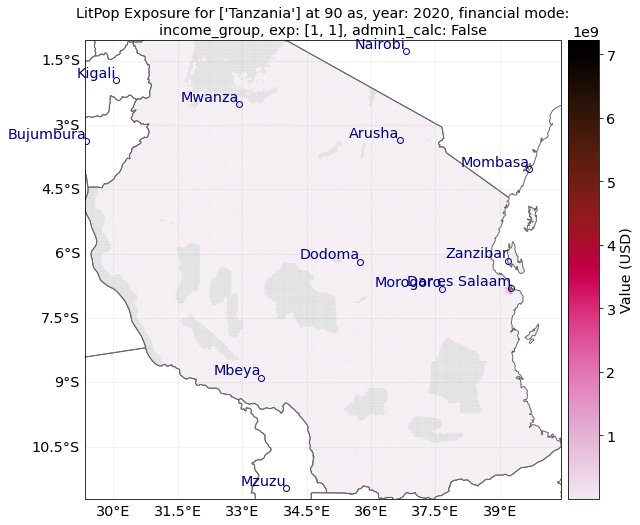

In [23]:
# Initiate a LitPop exposure entity for Tanzania with varied resolution and fin_mode:

ent = LitPop()
ent.set_country('Tanzania', fin_mode='income_group', res_arcsec=90) # try other fin_modes: 'gdp', 'nfw', 'pc'
# plot exposure:
ent.plot_hexbin(pop_name=True, vmin=1000)

This map shows like the default one above, the only difference is the absolute value per pixel: Note that the range of the color scale has changed because the total asset value estimated with the income_group mode is larger than produced capital stock.

### Settings: resolution (res_arcsec) and reference_year

We can also change the resolution in arc seconds to one of these values: 30, 60, 120, 300, 600, 3600.

$30 arcsec \approx 1 km$.

$3600 arcsec = 1\degree \approx 110 km$.

Additionally, we can change the year our exposure is supposed to represent. For this, nightlight and population data  are used that are closest to the requested years. Macroeconomic indicators like produced capital are interpolated from available data or scaled proportional to GDP.

Let's estimate a produced capital exposure map for Switzerland in 2017 with a resolution of 300 arcsec:

2021-06-21 16:03:18,085 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: CHE, 756 ...
 
2021-06-21 16:03:18,087 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2017. Using nearest available year for GPW population data: 2015
2021-06-21 16:03:18,089 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-21 16:03:18,934 - climada.util.finance - INFO - GDP CHE 2014: 7.092e+11.
2021-06-21 16:03:19,361 - climada.util.finance - INFO - GDP CHE 2017: 6.800e+11.
2021-06-21 16:03:19,383 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-21 16:03:19,383 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-21 16:03:19,384 - climada.entity.exposures.base - INFO - cover not set.
2021-06-21 16:03:19,386 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-21 16:03:19,387 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-21 16:03:19,38

<GeoAxesSubplot:title={'center':"LitPop Exposure for ['CHE'] at 300 as, year: 2017, financial mode: pc,\nexp: [1, 1], admin1_calc: False"}>

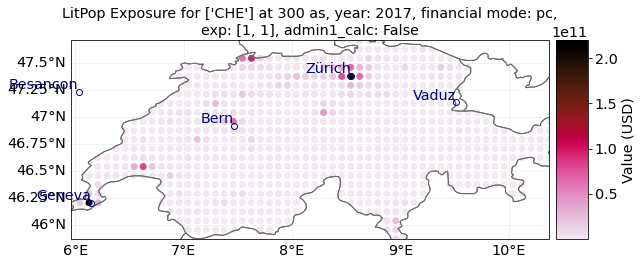

In [12]:
ent = LitPop()
ent.set_country('CHE', fin_mode='pc', res_arcsec=300, reference_year=2017)

# plot exposure with larger line width for better visibility:
ent.plot_scatter()


As can you can read from the logger output above the plot, the following data time steps were used to estimate 2017's exposure:
- GPW Population of 2015 (closest year)
- BlackMarble Nightlights of 2016 (closest year)
- Produced capital of 2014 (closest year), inflated proportional to the GDP increase from 2014 to 2017. This is an inflation of roughly 4.5% in this case.


### Settings: exponents of $Lit^mPop^n$

LitPop per pixel is the product of the exponents of nightlights+1 (Lit) and Population count (Pop).

$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \N_0$ (Default values are $m=n=1$).

We can also change m and n.

### Wrapper methods: *set_lit* and *set_pop*

The wrapper methods `set_lit` and `set_pop` can be used to produce exposures that are purely nightlight based or purely population based. Note that `set_pop` sets population, not monetary value.

**For countries with badly resolved population data (i.e. Jamaica or Uzbekistan), it can make sense to use nightlights only, i.e. an high exponent of Lit instead of LitPop.** 
Note that if Pop is not used, $Lit = nightlights$ instead of $nightlights+1$.

Let's compare exposure maps for $LitPop=Lit^1Pop^1$ (default); $Lit^4$; and $Pop^1$ Jamaica at a resolution of 30 arcsec.

Please execute one cell after the other:


2021-06-22 11:45:12,318 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: JAM, 388 ...
 
2021-06-22 11:45:12,319 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2014. Using nearest available year for GPW population data: 2015
2021-06-22 11:45:12,320 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:45:13,054 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 11:45:13,055 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 11:45:13,056 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 11:45:13,056 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 11:45:13,058 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-22 11:45:17,722 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: JAM, 388 ...
 
2021-06-22 11:45:17,723 - climada.entity.exposures.litpop.gp

'Lit^0 * Pop^1'

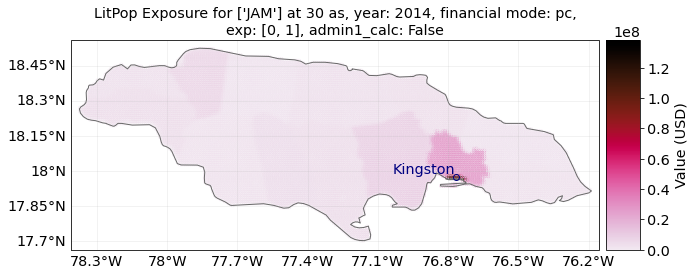

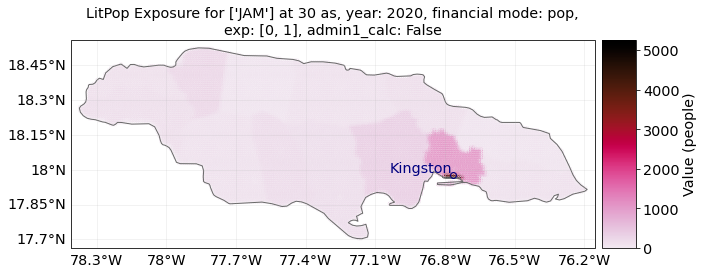

In [24]:
exp = LitPop()
res = 30
country = 'JAM' # Try different countries, i.e. 'JAM', 'CHE', 'RWA', 'MEX'
markersize = 4
buffer_deg=.04
# The argument 'exponents' is used to set the power with which Lit and Pop go into LitPop:

exp.set_countries(country, res_arcsec=res, reference_year=2014, exponents=[0, 1])# Exposure based on population only
exp.plot_hexbin(linewidth=markersize, buffer=buffer_deg)
# Compare to the population map:
exp.set_pop(country, res_arcsec=res)
exp.plot_hexbin(linewidth=markersize, buffer=buffer_deg)
"""Lit^0 * Pop^1"""

2021-06-22 11:26:04,731 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: JAM, 388 ...
 
2021-06-22 11:26:04,732 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2014. Using nearest available year for GPW population data: 2015
2021-06-22 11:26:04,733 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:26:05,433 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 11:26:05,434 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 11:26:05,435 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 11:26:05,435 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 11:26:05,438 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-22 11:26:05,440 - climada.util.coordinates - INFO - Setting geometry points.
2021-06-22 11:26:10,423 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for

'Lit^4 Pop^0'

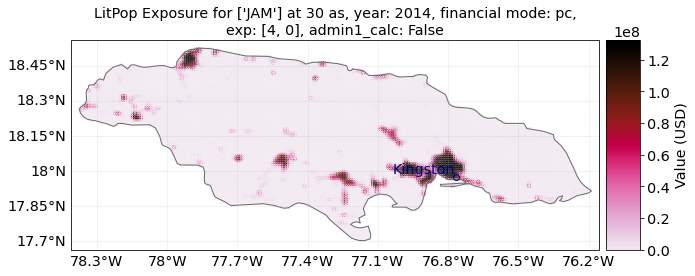

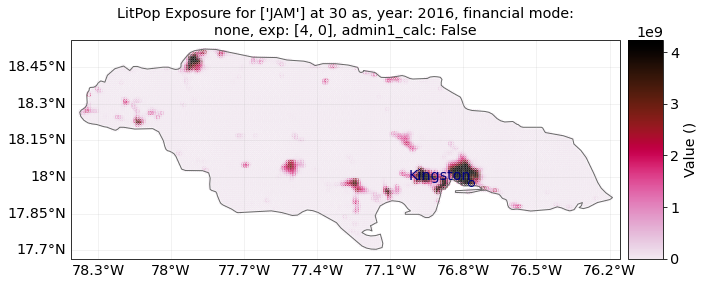

In [18]:
# JAMAICA continued: nightlights only
exp = LitPop()
exp.set_countries(country, res_arcsec=res, reference_year=2014, exponents=[4, 0]) # Nightlights^4 only
exp.set_geometry_points()
exp.plot_hexbin(linewidth=markersize, buffer=buffer_deg)
# This does the same as when using the wrapper method `set_lit` with fin_mode='pc':
exp.set_lit(country, res_arcsec=res, exponent=4, fin_mode='pc')
exp.plot_hexbin(linewidth=markersize, buffer=buffer_deg)
# Compare the original nightlight intensity at 15 as:
exp.set_lit(country, res_arcsec=15, exponent=1, fin_mode='none')
exp.plot_hexbin(linewidth=markersize, buffer=buffer_deg)
"""Lit^4 Pop^0"""

2021-06-04 17:09:54,008 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30 arcsec.
2021-06-04 17:10:03,375 - climada.entity.exposures.gpw_import - INFO - Reference year: 2014. Using nearest available year for GPW population data: 2015
2021-06-04 17:10:03,376 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2021-06-04 17:10:15,289 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-06-04 17:10:15,290 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-06-04 17:10:15,290 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-06-04 17:10:15,291 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-06-04 17:10:15,299 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-06-04 17:10:15,312 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-06-04 17:10:15,338 - climada.en

'Lit^1 * Pop^1'

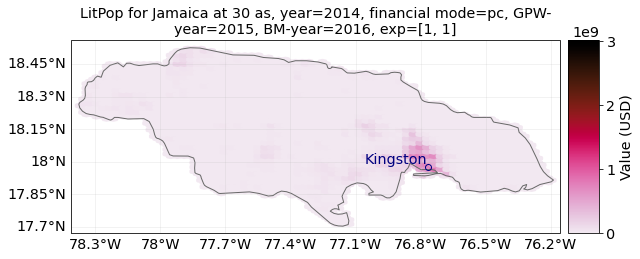

In [8]:
ent.set_country(country, res_arcsec=res, reference_year=2014, exponents=[1, 1]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^1 * Pop^1"""

For **Switzerland**, population is resolved on the 3rd administrative level, with 2538 distinct geographical units. Therefore, the purely population-based map is highly resolved.

For **Jamaica**, population is only resolved on the 1st administrative level, with only 14 distinct geographical units. Therefore, the purely population-based map shows large monotonous patches. The combination of Lit and Pop results in a concentration of asset value estimates around the capital city Kingston.

### Multiple countries
Computing LitPop-entities for a list of countries and plot a log-normal exposure map:

In [27]:
# Initiate GDP-Entity for Tanzania, Rwanda, and Burundi:
exp = LitPop()
countries_list = ['BDI', 'RWA', 'TZA']
exp.set_countries(countries_list, res_arcsec=120, reference_year=2014, fin_mode='gdp')

# Note that `exp.gdf.region_id` is a number identifying each country.
print('\n Region IDs (`region_id`) in this exposure:')
print(exp.gdf.region_id.unique())

2021-06-22 11:52:52,207 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: BDI, 108 ...
 
2021-06-22 11:52:52,208 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2014. Using nearest available year for GPW population data: 2015
2021-06-22 11:52:52,210 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:52:52,960 - climada.util.finance - INFO - GDP BDI 2014: 2.706e+09.
2021-06-22 11:52:53,201 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: RWA, 646 ...
 
2021-06-22 11:52:53,202 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2014. Using nearest available year for GPW population data: 2015
2021-06-22 11:52:53,203 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:52:53,920 - climada.util.finance - INFO - GDP RWA 2014: 8.246e+09.
2021-06-22 11:52:54,168 - climada.entity.exposures.litpop.

'GDP disaggregation with LitPop for Tanzania, Rwanda, and Burundi (2014)'

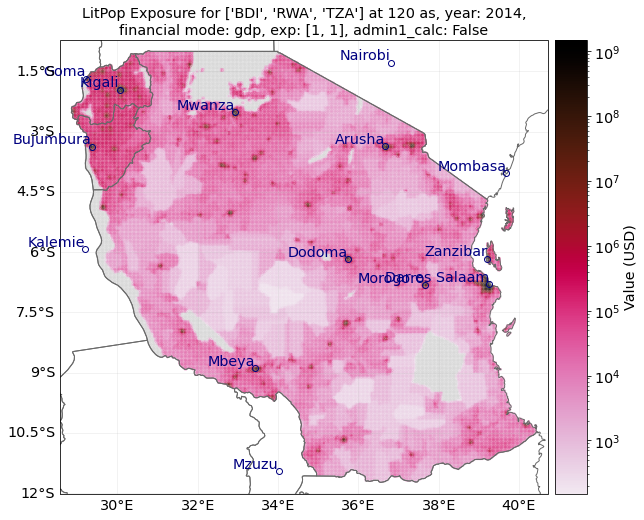

In [12]:
# Plot GDP-Entity for Tanzania, Rwanda, and Burundi:
# ent.plot_hexbin(linewidth=2, buffer=.3) # plot using linear colormap
# ent.plot_hexbin(linewidth=2, buffer=.3, bins='log') # plot using logarithmic colormap
norm=colors.LogNorm(vmin=1.5e2, vmax=1.5e9) # setting range for the log-normal scale
ent.plot_hexbin(linewidth=2, buffer=.3, norm=norm) # log-normal colormap from USD 150 to USD 1'500'000'000.
"""GDP disaggregation with LitPop for Tanzania, Rwanda, and Burundi (2014)"""

## Sub-national (admin-1) GDP as intermediate downscaling layer <a class="anchor" id="admin1"></a>

In order to improve downscaling for countries with large regional differences within, a subnational breakdown of GDP can be used as an intermediate downscaling layer wherever available.

The sub-national (admin-1) GDP-breakdown needs to be added manually as a ".xls"-file to the folder *data/system/GSDP/* in the CLIMADA-directory. Currently, such data is provided for more than 10 countries, including USA, India, and China.

The xls-file requires at least the following columns (with names specified in row 1):
- State_Province: Names of admin-1 regions, i.e. states, cantons, provinces. Names need to match the naming of admin-1 shapes in the data used by the python package *cartopy.io* (c.f. *shapereader.natural_earth(name='admin_1_states_provinces')*)
- GSDP_ref: value of sub-national GDP to be used (absolute or relative values)
- Postal (optional): Alternative identifier of region, if names do not match wioth cartopy. Needs to correspond to the Postal-identifiers used in the shapereader of *cartopy.io*.

Please note that while admin1-GDP will per definition improve the downscaling of *GDP*, it might not neccessarily improve the downscaling quality for other asset bases like produced capital (pc).

*How To:*

The intermediadte downscaling layer can be activated with the option *admin1_calc*.

The option *adm1_scatter* produces a scatter plot to compare the modelled and observed GDP per admin-1 region.

In [13]:
# Initiate GDP-Entity for Switzerland, with and without admin1_calc:

ent_adm0 = LitPop()
ent_adm0.set_country('CHE', res_arcsec=30, fin_mode='gdp', admin1_calc=False)
ent_adm0.set_geometry_points()

ent_adm1 = LitPop()
ent_adm1.set_country('CHE', res_arcsec=30, fin_mode='gdp', admin1_calc=True)

ent_adm0.check()
ent_adm1.check()
print('Done.')

2021-06-22 11:18:17,077 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: CHE, 756 ...
 
2021-06-22 11:18:17,079 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:20,637 - climada.util.finance - INFO - GDP CHE 2019: 7.031e+11.
2021-06-22 11:18:20,670 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 11:18:20,671 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 11:18:20,671 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 11:18:20,672 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 11:18:20,673 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-22 11:18:20,677 - climada.util.coordinates - INFO - Setting geometry points.
2021-06-22 11:18:23,254 - climada.util.finance - INFO - GDP CHE 2019: 7.031e+11.
2021-06-22 11:18:23,255 - climada.entity.exposures.litpop.litpop - INFO - Valais
2021-06-22 11:18:23,25

/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:25,122 - climada.entity.exposures.litpop.litpop - INFO - Ticino
2021-06-22 11:18:25,123 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:25,436 - climada.util.coordinates - INFO - Setting region_id 9212 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:26,321 - climada.entity.exposures.litpop.litpop - INFO - Graubünden
2021-06-22 11:18:26,322 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:26,985 - climada.util.coordinates - INFO - Setting region_id 23544 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:27,971 - climada.entity.exposures.litpop.litpop - INFO - Schaffhausen
2021-06-22 11:18:27,972 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:28,057 - climada.util.coordinates - INFO - Setting region_id 1197 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:29,038 - climada.util.coordinates - INFO - Setting region_id 35 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:29,920 - climada.entity.exposures.litpop.litpop - INFO - Thurgau
2021-06-22 11:18:29,921 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:30,066 - climada.util.coordinates - INFO - Setting region_id 3663 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:30,922 - climada.entity.exposures.litpop.litpop - INFO - Zürich
2021-06-22 11:18:30,923 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:31,117 - climada.util.coordinates - INFO - Setting region_id 4875 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:31,978 - climada.entity.exposures.litpop.litpop - INFO - Aargau
2021-06-22 11:18:31,979 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:32,172 - climada.util.coordinates - INFO - Setting region_id 5046 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:33,060 - climada.entity.exposures.litpop.litpop - INFO - Basel-Stadt
2021-06-22 11:18:33,061 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:33,109 - climada.util.coordinates - INFO - Setting region_id 162 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:33,993 - climada.entity.exposures.litpop.litpop - INFO - Basel-Landschaft
2021-06-22 11:18:33,994 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:34,098 - climada.util.coordinates - INFO - Setting region_id 1932 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:35,004 - climada.util.coordinates - INFO - Setting region_id 21 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:35,874 - climada.entity.exposures.litpop.litpop - INFO - Sankt Gallen
2021-06-22 11:18:35,876 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:36,160 - climada.util.coordinates - INFO - Setting region_id 8480 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:37,110 - climada.util.coordinates - INFO - Setting region_id 1508 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:37,975 - climada.entity.exposures.litpop.litpop - INFO - Solothurn
2021-06-22 11:18:37,976 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:38,022 - climada.util.coordinates - INFO - Setting region_id 84 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:38,947 - climada.util.coordinates - INFO - Setting region_id 54 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'

2021-06-22 11:18:40,256 - climada.util.coordinates - INFO - Setting region_id 4233 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:41,117 - climada.entity.exposures.litpop.litpop - INFO - Jura
2021-06-22 11:18:41,119 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:41,267 - climada.util.coordinates - INFO - Setting region_id 3696 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:42,136 - climada.entity.exposures.litpop.litpop - INFO - Genève
2021-06-22 11:18:42,138 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:42,218 - climada.util.coordinates - INFO - Setting region_id 1000 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:43,106 - climada.entity.exposures.litpop.litpop - INFO - Vaud
2021-06-22 11:18:43,107 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:43,496 - climada.util.coordinates - INFO - Setting region_id 13195 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:44,391 - climada.util.coordinates - INFO - Setting region_id 30 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:45,275 - climada.util.coordinates - INFO - Setting region_id 72 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:46,183 - climada.util.coordinates - INFO - Setting region_id 340 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:47,040 - climada.entity.exposures.litpop.litpop - INFO - Neuchâtel
2021-06-22 11:18:47,042 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:47,181 - climada.util.coordinates - INFO - Setting region_id 3240 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:48,071 - climada.entity.exposures.litpop.litpop - INFO - Bern
2021-06-22 11:18:48,072 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:48,113 - climada.util.coordinates - INFO - Setting region_id 20 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'

2021-06-22 11:18:49,610 - climada.util.coordinates - INFO - Setting region_id 23280 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:50,706 - climada.util.coordinates - INFO - Setting region_id 6 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:51,583 - climada.entity.exposures.litpop.litpop - INFO - Lucerne
2021-06-22 11:18:51,584 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:51,775 - climada.util.coordinates - INFO - Setting region_id 4941 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:52,627 - climada.entity.exposures.litpop.litpop - INFO - Zug
2021-06-22 11:18:52,628 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:52,700 - climada.util.coordinates - INFO - Setting region_id 760 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:53,557 - climada.entity.exposures.litpop.litpop - INFO - Uri
2021-06-22 11:18:53,558 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:53,719 - climada.util.coordinates - INFO - Setting region_id 3696 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:54,596 - climada.entity.exposures.litpop.litpop - INFO - Schwyz
2021-06-22 11:18:54,597 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:54,730 - climada.util.coordinates - INFO - Setting region_id 2993 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:55,590 - climada.entity.exposures.litpop.litpop - INFO - Glarus
2021-06-22 11:18:55,592 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:55,710 - climada.util.coordinates - INFO - Setting region_id 2070 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:56,575 - climada.entity.exposures.litpop.litpop - INFO - Nidwalden
2021-06-22 11:18:56,577 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:18:56,663 - climada.util.coordinates - INFO - Setting region_id 1218 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:57,508 - climada.entity.exposures.litpop.litpop - INFO - Fribourg
2021-06-22 11:18:57,510 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:18:57,701 - climada.util.coordinates - INFO - Setting region_id 4760 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:58,576 - climada.util.coordinates - INFO - Setting region_id 6 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:18:59,471 - climada.util.coordinates - INFO - Setting region_id 336 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:00,349 - climada.util.coordinates - INFO - Setting region_id 30 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:01,236 - climada.util.coordinates - INFO - Setting region_id 72 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:02,076 - climada.entity.exposures.litpop.litpop - INFO - Obwalden
2021-06-22 11:19:02,078 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:19:02,161 - climada.util.coordinates - INFO - Setting region_id 1080 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:03,106 - climada.util.coordinates - INFO - Setting region_id 234 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:04,056 - climada.entity.exposures.litpop.litpop - INFO - Appenzell Ausserrhoden
2021-06-22 11:19:04,058 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:19:04,155 - climada.util.coordinates - INFO - Setting region_id 1404 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:05,091 - climada.entity.exposures.litpop.litpop - INFO - Appenzell Innerrhoden
2021-06-22 11:19:05,093 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:19:05,136 - climada.util.coordinates - INFO - Setting region_id 36 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:06,043 - climada.util.coordinates - INFO - Setting region_id 437 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:06,964 - climada.util.coordinates - INFO - Setting region_id 48 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 11:19:07,935 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 11:19:07,936 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 11:19:07,937 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 11:19:07,938 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 11:19:07,939 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-22 11:19:07,943 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 11:19:07,944 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 11:19:07,945 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 11:19:07,947 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 11:19:07,947 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-22 11:19:07,950 - climada.util.coordinates - INFO - Setting geometry points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:19:09,671 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 11:19:09,672 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 11:19:09,673 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 11:19:09,675 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 11:19:09,678 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-22 11:19:09,681 - climada.util.coordinates - INFO - Setting geometry points.
Done.


admin-0: First figure
admin-1: Second figure


'Note the small differences in eastern Switzerland.'

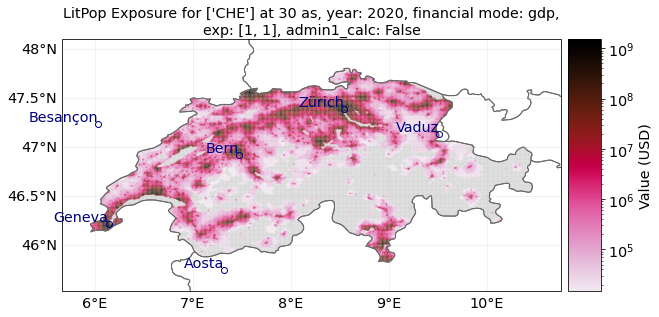

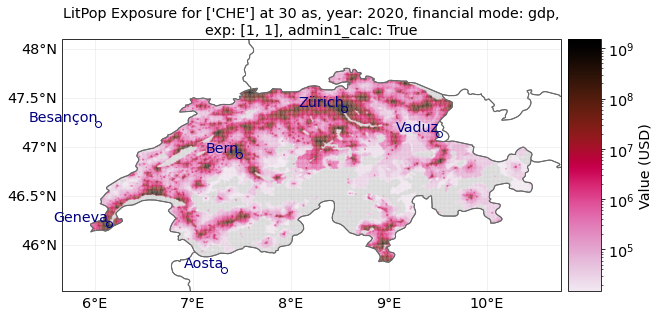

In [14]:
# Plotting:
norm=colors.LogNorm(vmin=1.5e4, vmax=1.5e9) # setting range for the log-normal scale
ent_adm0.plot_hexbin(buffer=.3, norm=norm)
ent_adm1.plot_hexbin(buffer=.3, norm=norm)
print('admin-0: First figure')
print('admin-1: Second figure')
'''Note the small differences in eastern Switzerland.'''

## Set custom shapes <a class="anchor" id="custom_shape"></a>

The methods `LitPop.set_custom_shape_from_country` and `LitPop.set_custom_shape` initiate a LitPop-exposure instance for a given custom shape instead of a country. This can be used to initiate exposure for admin1-regions, i.e. cantons, states, districts, - but also for bounding boxes etc.

The difference between the two methods is that for `set_custom_shape_from_country`, the exposure for the whole country is initiated first and then it is cropped to the shape. With `set_custom_shape`, the shape is initiated directly which is much more resource efficient but requires a `total_value` to be provided by the user.

### Example: Zurich area

2021-06-22 11:53:29,971 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:53:30,075 - climada.util.coordinates - INFO - Setting region_id 972 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-06-22 11:53:31,724 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: CHE, 756 ...
 
2021-06-22 11:53:31,725 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:53:35,641 - climada.util.finance - INFO - GDP CHE 2014: 7.092e+11.
2021-06-22 11:53:36,077 - climada.util.finance - INFO - GDP CHE 2019: 7.031e+11.
2021-06-22 11:53:36,269 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 11:53:36,270 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 11:53:36,270 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 11:53:36,271 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 11:53:36,272 - climada.entity.exposures.base - INFO - centr_ not set.


'Note the difference in total value between the two exposure sets!'

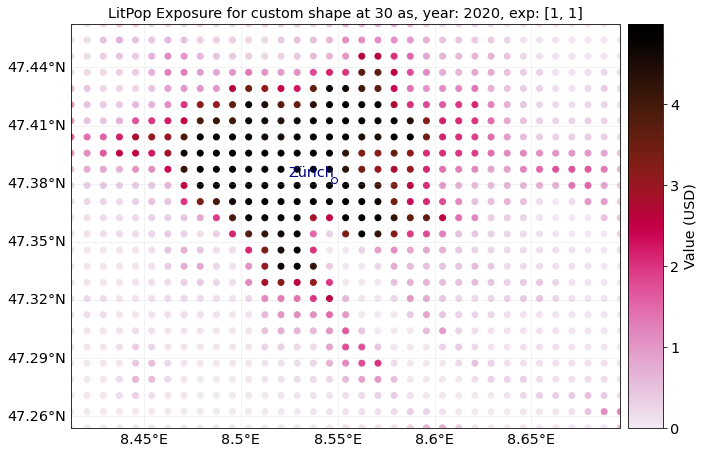

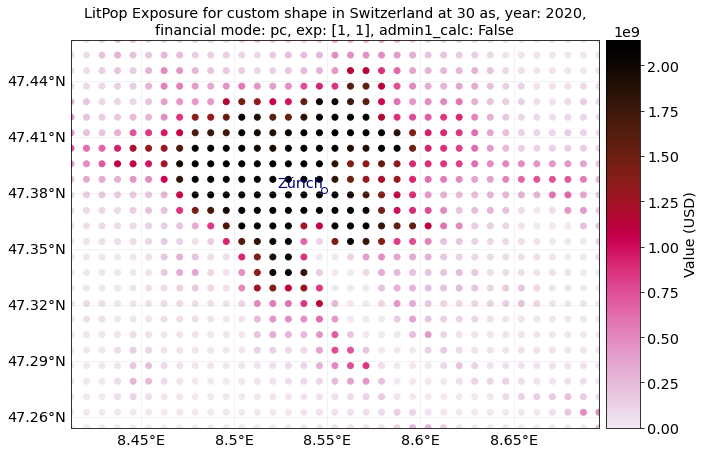

In [28]:
from shapely.geometry import Polygon
"""initiate LitPop exposures for a geographical box around the city of Zurich:"""
bounds = (8.41, 47.25, 8.70, 47.47) # (min_lon, max_lon, min_lat, max_lat)
total_value=1000 # required user input for `set_custom_shape`, here we just assume USD 1000 of total value
shape = Polygon([
                (bounds[0], bounds[3]),
                (bounds[2], bounds[3]),
                (bounds[2], bounds[1]),
                (bounds[0], bounds[1])
                ])
exp = LitPop()
exp.set_custom_shape(shape, total_value)
exp.plot_scatter()
# `set_custom_shape_from_country` does not require `total_value`, but is slower to compute:
exp.set_custom_shape_from_country(shape, 'Switzerland')
exp.plot_scatter()
"""Note the difference in total value between the two exposure sets!"""

2021-06-22 11:55:01,785 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 11:55:01,885 - climada.util.coordinates - INFO - Setting region_id 972 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


'Population exposure for a custom shape can be initiated directly via `set_pop` without providing `total_value`'

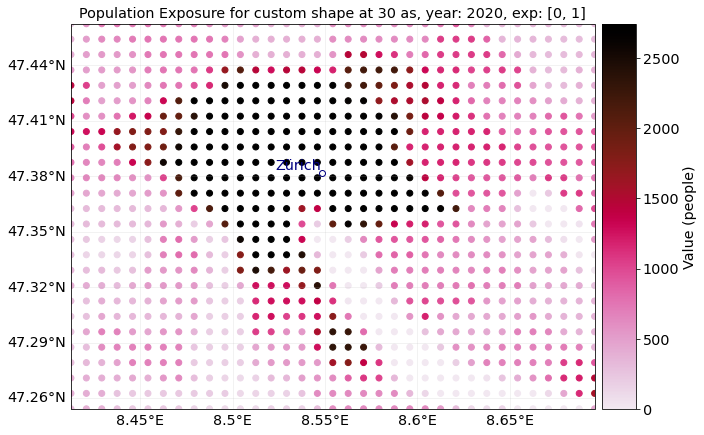

In [30]:
from shapely.geometry import Polygon
"""initiate population exposure for a geographical box around the city of Zurich:"""
bounds = (8.41, 47.25, 8.70, 47.47) # (min_lon, max_lon, min_lat, max_lat)
total_value=100 # required user input for `set_custom_shape`, here we just assume USD 100 of total value
shape = Polygon([
                (bounds[0], bounds[3]),
                (bounds[2], bounds[3]),
                (bounds[2], bounds[1]),
                (bounds[0], bounds[1])
                ])
exp = LitPop()
exp.set_pop(shape=shape)
exp.plot_scatter()

"""Population exposure for a custom shape can be initiated directly via `set_pop` without providing `total_value`"""

### Example: State of Florida <a class="anchor" id="florida"></a>

Using `LitPop.set_custom_shape_from_country` and `LitPop.set_custom_shape` we initiate LitPop exposures for Florida:

['Minnesota', 'Washington', 'Idaho', 'Montana', 'North Dakota', 'Michigan', 'Maine', 'Ohio', 'New Hampshire', 'New York', 'Vermont', 'Pennsylvania', 'Arizona', 'California', 'New Mexico', 'Texas', 'Alaska', 'Louisiana', 'Mississippi', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'District of Columbia', 'Maryland', 'Delaware', 'New Jersey', 'Connecticut', 'Rhode Island', 'Massachusetts', 'Oregon', 'Hawaii', 'Utah', 'Wyoming', 'Nevada', 'Colorado', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Kentucky', 'Arkansas', 'Tennessee', 'West Virginia', 'Indiana']
Florida index: 20
2021-06-22 12:20:42,895 - climada.util.finance - INFO - GDP USA 2014: 1.753e+13.
2021-06-22 12:20:43,422 - climada.util.finance - INFO - GDP USA 2019: 2.143e+13.
2021-06-22 12:20:43,425 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 12:20:44,339 - climada.util.coordinates - INFO - Setting regio

/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 12:20:45,470 - climada.util.coordinates - INFO - Setting region_id 1 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 12:20:46,364 - climada.util.coordinates - INFO - Setting region_id 1 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 12:20:47,271 - climada.util.coordinates - INFO - Setting region_id 4 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 12:20:48,191 - climada.util.coordinates - INFO - Setting region_id 1 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 12:20:49,119 - climada.util.coordinates - INFO - Setting region_id 8 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 12:20:50,036 - climada.util.coordinates - INFO - Setting region_id 3 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-22 12:20:50,917 - climada.util.coordinates - INFO - Setting region_id 5 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'

2021-06-22 12:20:52,961 - climada.entity.exposures.litpop.litpop - INFO - LitPop: Init Exposure for country: USA, 840 ...
 
2021-06-22 12:20:52,963 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-22 12:21:20,064 - climada.util.finance - INFO - GDP USA 2014: 1.753e+13.
2021-06-22 12:21:20,549 - climada.util.finance - INFO - GDP USA 2019: 2.143e+13.
2021-06-22 12:21:24,651 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-22 12:21:24,652 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-22 12:21:24,652 - climada.entity.exposures.base - INFO - cover not set.
2021-06-22 12:21:24,654 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-22 12:21:24,656 - climada.entity.exposures.base - INFO - centr_ not set.


'Note the differences in computational speed and total value between the two approaches'

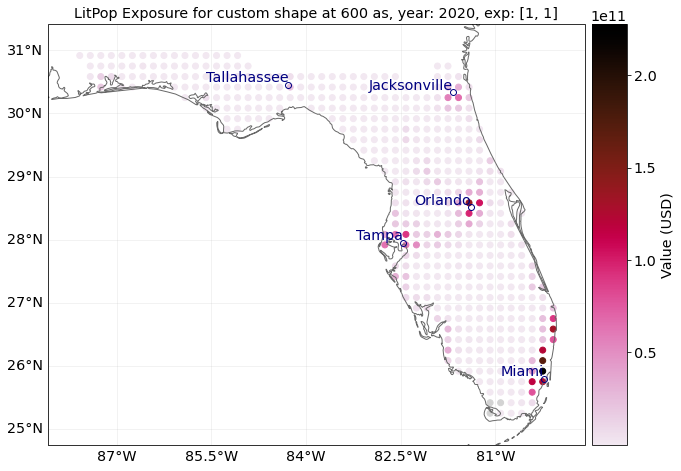

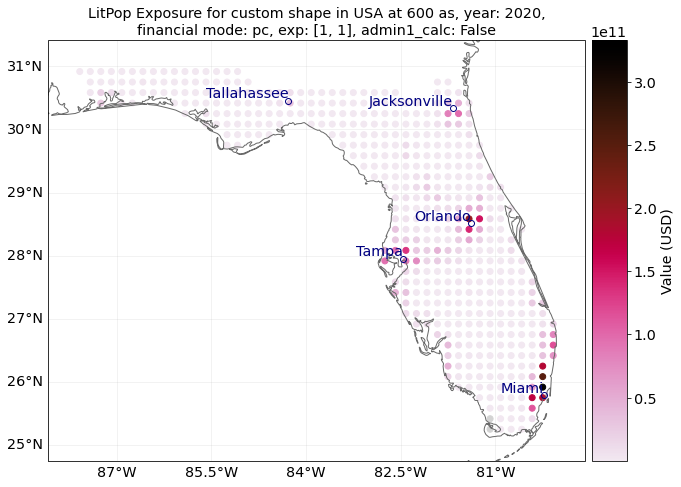

In [2]:
import climada.util.coordinates as u_coord
import climada.entity.exposures.litpop.litpop as lp

country_iso3a = 'USA'
state_name = 'Florida'
reslution_arcsec = 600 
"""First, we need to get the shape of Florida:"""
admin1_info, admin1_shapes = u_coord.get_admin1_info(country_iso3a)
admin1_info = admin1_info[country_iso3a]
admin1_shapes = admin1_shapes[country_iso3a]
admin1_names = [record['name'] for record in admin1_info]
print(admin1_names)
for idx, name in enumerate(admin1_names):
    if admin1_names[idx]==state_name:
        break
print('Florida index: ' + str(idx))

"""Secondly, we estimate the `total_value`"""
# `total_value` required user input for `set_custom_shape`, here we assume 5% of total value of the whole USA:
total_value = 0.05 * lp.get_total_value_per_country(country_iso3a, 'pc', 2020)

"""Then, we can initiate the exposures for Florida:"""
exp = LitPop()
exp.set_custom_shape(admin1_shapes[idx], total_value, res_arcsec=600, reference_year=2020)
exp.plot_scatter(vmin=100, buffer=.5)
# `set_custom_shape_from_country` does not require `total_value`, but is slower to compute,
# because first, the exposure for the whole USA is initiated:
exp.set_custom_shape_from_country(admin1_shapes[idx], country_iso3a, res_arcsec=600, reference_year=2020)
exp.plot_scatter(vmin=100, buffer=.5)
"""Note the differences in computational speed and total value between the two approaches"""